# Regularization in Machine Learning

This notebook documents the three main types of regularization for linear regression:
1. **Ridge Regression** - L2 Regularization
2. **Lasso Regression** - L1 Regularization
3. **Elastic Net** - Combination of L1 and L2

In [24]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Configuration for plots
plt.rcParams['figure.figsize'] = (12, 4)
plt.style.use('seaborn-v0_8-darkgrid')

## 1. Data Generation

We will create a synthetic dataset with some relevant features and some irrelevant features (noise).

In [25]:
# Generate synthetic data
np.random.seed(42)
X, y = make_regression(n_samples=200, n_features=20, n_informative=10, 
                       noise=10, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (160, 20)
Test set size: (40, 20)


## 2. Ridge Regression - L2

**Key concept:** Ridge adds an L2 penalty to the cost function:

$$J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\sum_{i=1}^{n}\theta_i^2$$

- Penalizes large coefficients
- Coefficients are reduced but **never reach exactly zero**
- Useful when all features are potentially relevant

In [26]:
# Train Ridge models with different alpha values
alphas = [0.001, 0.1, 1, 10, 100]
ridge_models = {}

print("Ridge Regression - Results:\n" + "="*60)

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train_scaled, y_train)
    ridge_models[alpha] = ridge
    
    y_pred = ridge.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Alpha = {alpha:6.3f} | MSE = {mse:8.2f} | R² = {r2:.4f} | Non-zero coefs: {np.sum(ridge.coef_ != 0)}")

Ridge Regression - Results:
Alpha =  0.001 | MSE =   107.76 | R² = 0.9954 | Non-zero coefs: 20
Alpha =  0.100 | MSE =   107.34 | R² = 0.9954 | Non-zero coefs: 20
Alpha =  1.000 | MSE =   104.41 | R² = 0.9956 | Non-zero coefs: 20
Alpha = 10.000 | MSE =   153.15 | R² = 0.9935 | Non-zero coefs: 20
Alpha = 100.000 | MSE =  3330.83 | R² = 0.8585 | Non-zero coefs: 20


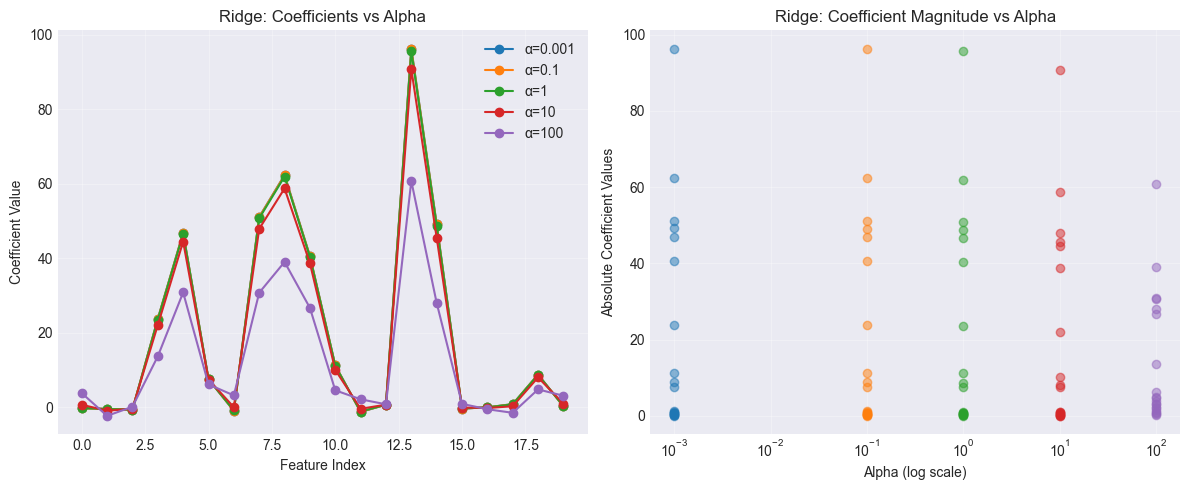

In [27]:
# Visualize how coefficients change with alpha
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for alpha in alphas:
    plt.plot(ridge_models[alpha].coef_, marker='o', label=f'α={alpha}')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge: Coefficients vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for alpha in alphas:
    plt.scatter([alpha]*len(ridge_models[alpha].coef_), 
                np.abs(ridge_models[alpha].coef_), alpha=0.5)
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Absolute Coefficient Values')
plt.title('Ridge: Coefficient Magnitude vs Alpha')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Lasso Regression - L1

**Key concept:** Lasso adds an L1 penalty to the cost function:

$$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n}|\theta_i|$$

- Penalizes large coefficients
- Coefficients **can reach exactly zero**
- Performs **automatic feature selection**
- Useful when we suspect only some features are relevant

In [28]:
# Train Lasso models with different alpha values
lasso_models = {}

print("Lasso Regression - Results:\n" + "="*60)

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    lasso_models[alpha] = lasso
    
    y_pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Count non-zero coefficients
    non_zero = np.sum(np.abs(lasso.coef_) > 1e-5)
    
    print(f"Alpha = {alpha:6.3f} | MSE = {mse:8.2f} | R² = {r2:.4f} | Non-zero coefs: {non_zero}")

Lasso Regression - Results:
Alpha =  0.001 | MSE =   107.75 | R² = 0.9954 | Non-zero coefs: 20
Alpha =  0.100 | MSE =   106.12 | R² = 0.9955 | Non-zero coefs: 19
Alpha =  1.000 | MSE =   110.12 | R² = 0.9953 | Non-zero coefs: 11
Alpha = 10.000 | MSE =   942.85 | R² = 0.9599 | Non-zero coefs: 7
Alpha = 100.000 | MSE = 21165.03 | R² = 0.1008 | Non-zero coefs: 1


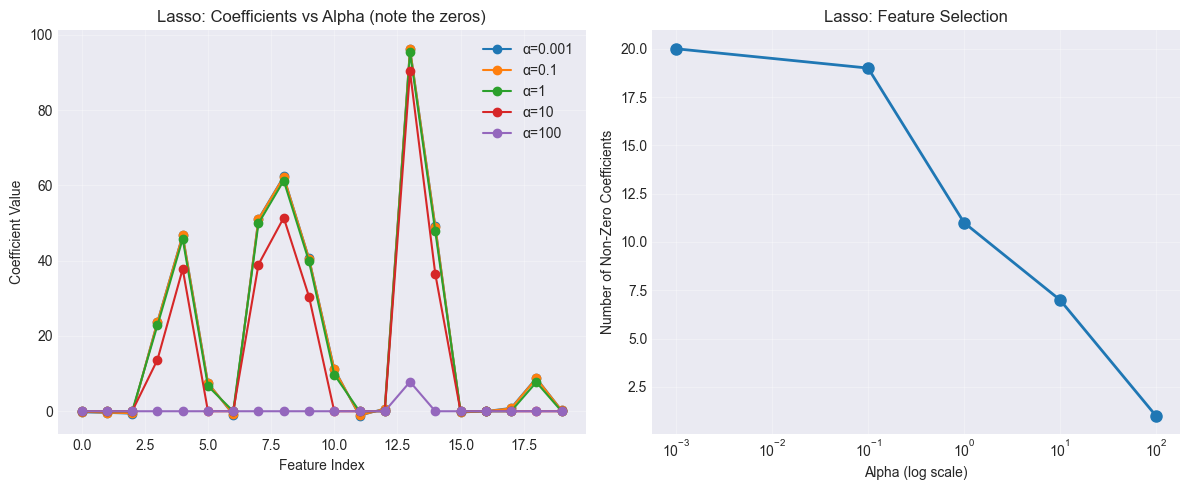

In [29]:
# Visualize how coefficients change with alpha
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for alpha in alphas:
    plt.plot(lasso_models[alpha].coef_, marker='o', label=f'α={alpha}')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso: Coefficients vs Alpha (note the zeros)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
non_zero_counts = [np.sum(np.abs(lasso_models[a].coef_) > 1e-5) for a in alphas]
plt.plot(alphas, non_zero_counts, marker='o', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Number of Non-Zero Coefficients')
plt.title('Lasso: Feature Selection')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Elastic Net - Combination L1 + L2

**Key concept:** Elastic Net combines L1 and L2 penalties:

$$J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n}|\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_i^2$$

Where:
- `r` is the `l1_ratio` (0 = Pure Ridge, 1 = Pure Lasso)
- Combines the best of both worlds
- Preferred when we have many correlated features

In [30]:
# Train Elastic Net models with different alpha and l1_ratio values
l1_ratios = [0.1, 0.5, 0.9]
elastic_models = {}

print("Elastic Net - Results:\n" + "="*70)

for l1_ratio in l1_ratios:
    print(f"\nl1_ratio = {l1_ratio} (closer to {'Lasso' if l1_ratio > 0.5 else 'Ridge'})")
    print("-" * 70)
    
    for alpha in alphas:
        elastic = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42, max_iter=10000)
        elastic.fit(X_train_scaled, y_train)
        elastic_models[(alpha, l1_ratio)] = elastic
        
        y_pred = elastic.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        non_zero = np.sum(np.abs(elastic.coef_) > 1e-5)
        
        print(f"  α={alpha:6.3f} | MSE={mse:8.2f} | R²={r2:.4f} | Non-zero coefs: {non_zero}")

Elastic Net - Results:

l1_ratio = 0.1 (closer to Ridge)
----------------------------------------------------------------------
  α= 0.001 | MSE=  107.16 | R²=0.9954 | Non-zero coefs: 20
  α= 0.100 | MSE=  219.77 | R²=0.9907 | Non-zero coefs: 20
  α= 1.000 | MSE= 5049.58 | R²=0.7855 | Non-zero coefs: 20
  α=10.000 | MSE=18811.79 | R²=0.2008 | Non-zero coefs: 18
  α=100.000 | MSE=23051.76 | R²=0.0207 | Non-zero coefs: 12

l1_ratio = 0.5 (closer to Ridge)
----------------------------------------------------------------------
  α= 0.001 | MSE=  107.42 | R²=0.9954 | Non-zero coefs: 20
  α= 0.100 | MSE=  132.00 | R²=0.9944 | Non-zero coefs: 20
  α= 1.000 | MSE= 2558.49 | R²=0.8913 | Non-zero coefs: 19
  α=10.000 | MSE=16313.45 | R²=0.3069 | Non-zero coefs: 15
  α=100.000 | MSE=23138.69 | R²=0.0170 | Non-zero coefs: 3

l1_ratio = 0.9 (closer to Lasso)
----------------------------------------------------------------------
  α= 0.001 | MSE=  107.68 | R²=0.9954 | Non-zero coefs: 20
  α= 0.100 |

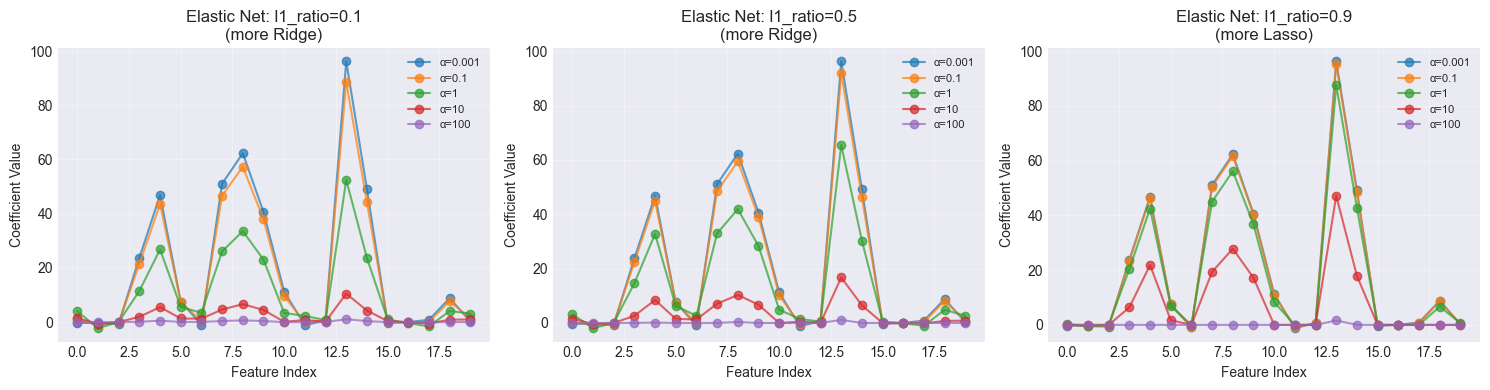

In [31]:
# Visualize Elastic Net with different l1_ratios
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, l1_ratio in enumerate(l1_ratios):
    ax = axes[idx]
    for alpha in alphas:
        ax.plot(elastic_models[(alpha, l1_ratio)].coef_, marker='o', 
                label=f'α={alpha}', alpha=0.7)
    
    ax.set_xlabel('Feature Index')
    ax.set_ylabel('Coefficient Value')
    ax.set_title(f'Elastic Net: l1_ratio={l1_ratio}\n({"more Lasso" if l1_ratio > 0.5 else "more Ridge"})')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Comparison of the Three Methods

Let's compare Ridge, Lasso, and Elastic Net with the same alpha value.

In [32]:
# Compare the three methods with alpha = 1
alpha_comparacion = 1

# Train the models
ridge_comp = Ridge(alpha=alpha_comparacion, random_state=42)
lasso_comp = Lasso(alpha=alpha_comparacion, random_state=42, max_iter=10000)
elastic_comp = ElasticNet(alpha=alpha_comparacion, l1_ratio=0.5, random_state=42, max_iter=10000)
linear_comp = LinearRegression()

modelos_comp = {
    'Linear (no regularization)': linear_comp,
    'Ridge (L2)': ridge_comp,
    'Lasso (L1)': lasso_comp,
    'Elastic Net (L1+L2)': elastic_comp
}

print(f"Model Comparison (alpha = {alpha_comparacion}):\n" + "="*70)

for nombre, modelo in modelos_comp.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    if hasattr(modelo, 'coef_'):
        non_zero = np.sum(np.abs(modelo.coef_) > 1e-5)
    else:
        non_zero = len(modelo.coef_)
    
    print(f"{nombre:30} | MSE={mse:8.2f} | R²={r2:.4f} | Non-zero coefs: {non_zero}")

Model Comparison (alpha = 1):
Linear (no regularization)     | MSE=  107.77 | R²=0.9954 | Non-zero coefs: 20
Ridge (L2)                     | MSE=  104.41 | R²=0.9956 | Non-zero coefs: 20
Lasso (L1)                     | MSE=  110.12 | R²=0.9953 | Non-zero coefs: 11
Elastic Net (L1+L2)            | MSE= 2558.49 | R²=0.8913 | Non-zero coefs: 19


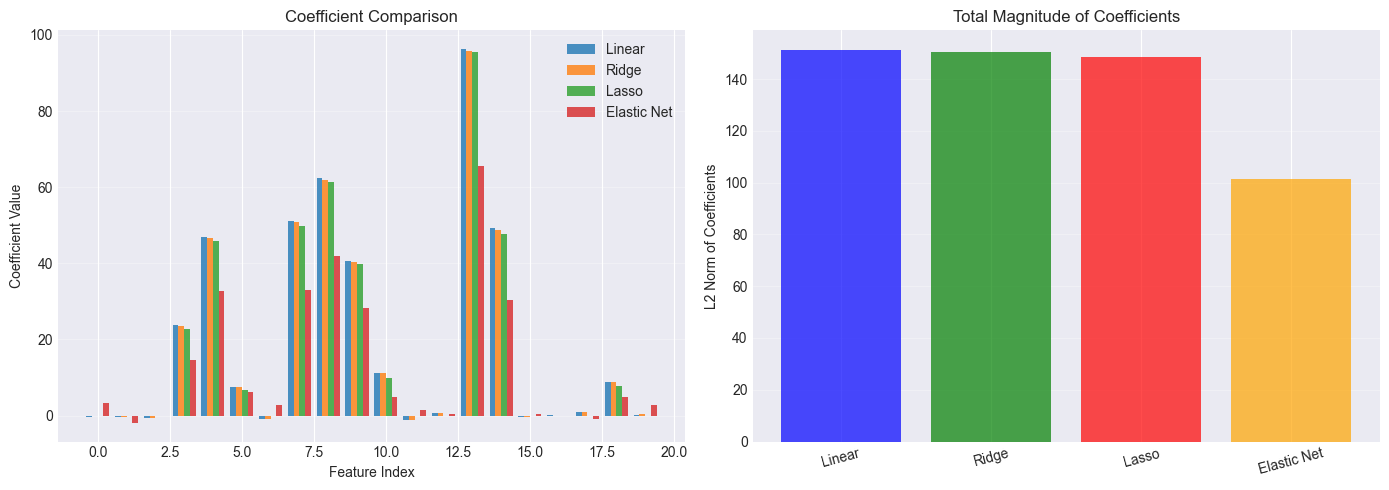

In [33]:
# Visualize coefficients of different methods
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
width = 0.2
x = np.arange(len(linear_comp.coef_))

plt.bar(x - 1.5*width, linear_comp.coef_, width, label='Linear', alpha=0.8)
plt.bar(x - 0.5*width, ridge_comp.coef_, width, label='Ridge', alpha=0.8)
plt.bar(x + 0.5*width, lasso_comp.coef_, width, label='Lasso', alpha=0.8)
plt.bar(x + 1.5*width, elastic_comp.coef_, width, label='Elastic Net', alpha=0.8)

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Comparison')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
magnitudes = {
    'Linear': np.linalg.norm(linear_comp.coef_),
    'Ridge': np.linalg.norm(ridge_comp.coef_),
    'Lasso': np.linalg.norm(lasso_comp.coef_),
    'Elastic Net': np.linalg.norm(elastic_comp.coef_)
}

plt.bar(magnitudes.keys(), magnitudes.values(), color=['blue', 'green', 'red', 'orange'], alpha=0.7)
plt.ylabel('L2 Norm of Coefficients')
plt.title('Total Magnitude of Coefficients')
plt.xticks(rotation=15)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 6. Summary and Conclusions

### When to use each method?

| Method | When to use | Advantages | Disadvantages |
|--------|-------------|----------|-------------|
| **Ridge (L2)** | When all features are potentially useful | - Simple and efficient<br>- Works well with correlated features | - Doesn't eliminate features<br>- Can be hard to interpret |
| **Lasso (L1)** | When we suspect only some features are relevant | - Automatic feature selection<br>- More interpretable models | - Arbitrary with correlated features<br>- Can be unstable |
| **Elastic Net** | With many features, especially if correlated | - Combines advantages of Ridge and Lasso<br>- More robust | - More hyperparameters to tune<br>- More complex |

### Key points:

1. **Ridge** reduces coefficients but never makes them exactly zero
2. **Lasso** can make coefficients exactly zero (feature selection)
3. **Elastic Net** is like a middle ground between Ridge and Lasso
4. The value of **alpha (α)** controls the strength of regularization:
   - α = 0: No regularization (normal linear regression)
   - α small: Little regularization
   - α large: Strong regularization (smaller coefficients)
5. Always **scale the features** before applying regularization
6. Use **cross-validation** to find the best alpha value

## 7. Additional Exercise: Finding the Best Alpha

We can use cross-validation to automatically find the best alpha value.

In [34]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

# Define range of alphas to test
alphas_cv = np.logspace(-3, 3, 100)

# Ridge with cross-validation
ridge_cv = RidgeCV(alphas=alphas_cv, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Lasso with cross-validation
lasso_cv = LassoCV(alphas=alphas_cv, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# Elastic Net with cross-validation
elastic_cv = ElasticNetCV(alphas=alphas_cv, l1_ratio=0.5, cv=5, max_iter=10000, random_state=42)
elastic_cv.fit(X_train_scaled, y_train)

print("Best alpha values found with cross-validation:\n" + "="*60)
print(f"Ridge:       α = {ridge_cv.alpha_:.4f}")
print(f"Lasso:       α = {lasso_cv.alpha_:.4f}")
print(f"Elastic Net: α = {elastic_cv.alpha_:.4f}")

# Evaluate on test set
print("\nPerformance on test set:\n" + "="*60)
for nombre, modelo in [('Ridge', ridge_cv), ('Lasso', lasso_cv), ('Elastic Net', elastic_cv)]:
    y_pred = modelo.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    non_zero = np.sum(np.abs(modelo.coef_) > 1e-5)
    print(f"{nombre:12} | MSE = {mse:8.2f} | R² = {r2:.4f} | Non-zero coefs: {non_zero}")

Best alpha values found with cross-validation:
Ridge:       α = 0.2310
Lasso:       α = 0.4037
Elastic Net: α = 0.0046

Performance on test set:
Ridge        | MSE =   106.81 | R² = 0.9955 | Non-zero coefs: 20
Lasso        | MSE =   103.65 | R² = 0.9956 | Non-zero coefs: 17
Elastic Net  | MSE =   106.25 | R² = 0.9955 | Non-zero coefs: 20


---

## Conclusion

### Understanding Regularization in Machine Learning

Regularization is a **fundamental technique** for building models that generalize well to new data. Through this notebook, we've explored three powerful regularization methods and their practical applications.

**Core Concepts Mastered:**

1. **L2 Regularization (Ridge)**
   - Shrinks coefficients toward zero without eliminating them
   - Ideal when all features contribute to predictions
   - Handles multicollinearity effectively

2. **L1 Regularization (Lasso)**
   - Performs automatic feature selection by zeroing out coefficients
   - Creates sparse, interpretable models
   - Best when only a subset of features are truly relevant

3. **Elastic Net (L1 + L2)**
   - Combines the strengths of both Ridge and Lasso
   - More robust and stable than Lasso alone
   - The go-to choice for high-dimensional data with correlated features

**Universal Principles:**

- **Always scale features** before applying regularization
- **Alpha (α)** is the regularization strength hyperparameter
  - Higher α = Stronger regularization = Simpler model
  - Lower α = Weaker regularization = More complex model
- **Cross-validation** is essential for finding optimal hyperparameters
- Regularization helps prevent overfitting without requiring more data

**When to Use Each Method:**

| Scenario | Best Choice | Reason |
|----------|-------------|--------|
| All features useful | **Ridge** | Keeps all features, reduces multicollinearity |
| Sparse features | **Lasso** | Automatic feature selection |
| Many correlated features | **Elastic Net** | Stable selection, balanced approach |
| Interpretability needed | **Lasso** | Explicit feature selection |
| Feature importance unclear | **Elastic Net** | Covers both scenarios |

### The Bigger Picture

Regularization isn't just about linear models—these concepts extend to:
- Logistic regression
- Neural networks (L2 = weight decay, L1 = sparsity)
- Support vector machines
- And virtually every modern ML algorithm

Mastering regularization gives you a powerful tool to control model complexity and improve generalization across all machine learning domains.

**Remember**: A model that performs well on training data but fails on test data is useless. Regularization helps bridge that gap!